In [ ]:
import pandas as pd

df=pd.read_csv('data/fraud.csv', index_col = 0)
# df.shape
# df.columns


# there is no null value
# df.info()
# df.isnull().sum()


# Check your data and define X and y : What is X and what is y? 
y = df['Class'].values
df = df.iloc[:,1:]
X = df.drop(columns = 'Class').values

df[['Class']].value_counts()
df['Class'].value_counts(normalize=True) * 100
#Fraud trans detection Original Data Result
#not-fraud (negative )   0        21337
#fraud    (positive)     1          356

#21337+356  => 21693




Class
0    98.358918
1     1.641082
Name: proportion, dtype: float64

In [78]:
df.shape
#df.columns


(21693, 30)

In [107]:
# perform train - test split. (40% as testing and 60% as training)
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split()

X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                    test_size = 0.40, 
                                    random_state=1)
# check the number of rows in the training and testing data
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)


X_train:  (13015, 29)
X_test:  (8678, 29)


In [11]:
13015 + 8678

21693

In [109]:
#--------------------------------------------------
## ----------- K-NN Classifier ------------------## 
#--------------------------------------------------
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

steps = [('scaler', StandardScaler()),         
         ('knn', KNeighborsClassifier(n_neighbors = 5))]

knn_pipeline = Pipeline(steps)
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

[[8538    3]
 [  28  109]]
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00      8541
       Fraud       0.97      0.80      0.88       137

    accuracy                           1.00      8678
   macro avg       0.98      0.90      0.94      8678
weighted avg       1.00      1.00      1.00      8678

0.9186226676477651


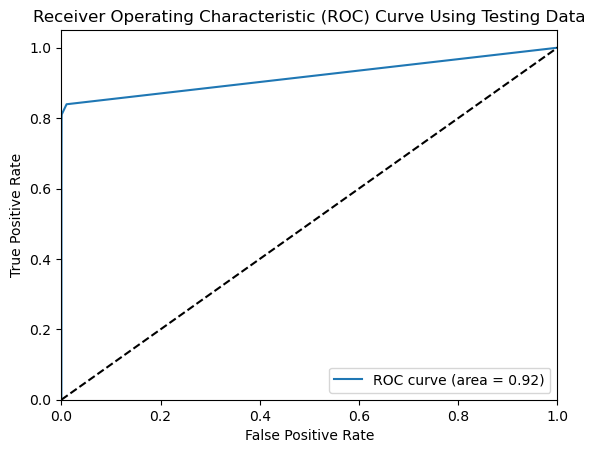

In [119]:
#--------------------------------------------------
## Model Evaluation ## 
#--------------------------------------------------
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

ypred_test = knn_pipeline.predict(X_test)
mat_clf = confusion_matrix(y_test, ypred_test)
report_clf = classification_report(y_test, ypred_test, target_names=["Not Fraud", "Fraud"])

print(mat_clf)
print(report_clf)

ypred_testP = knn_pipeline.predict_proba(X_test)
auc = roc_auc_score(y_test, ypred_testP[:,1])
print(auc)


fpr, tpr, thresholds = roc_curve(y_test, ypred_testP[:,1])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Using Testing Data')
plt.legend(loc="lower right")
plt.show()


#Confusion Matrix Definition
[[TN  FP]
 [FN  TP]]

True Negative (TN): Actual = 0, Predicted = 0 → Correctly predicted not fraud

False Positive (FP): Actual = 0, Predicted = 1 → Predicted fraud, but it’s not (false alarm)

False Negative (FN): Actual = 1, Predicted = 0 → Missed a fraud case! ❌

True Positive (TP): Actual = 1, Predicted = 1 → Correctly predicted fraud ✅

Why It Matters in Fraud Detection
FP (False Positive): Inconvenience to a customer (e.g., transaction blocked)

FN (False Negative): Very dangerous — fraud not caught!

So in fraud detection:

Recall (how many actual frauds you caught) is very important.

You want to minimize FN, even at the cost of a few extra FPs.

                 Predicted
                0       1
Actual   0     [TN     FP]
         1     [FN     TP]



#Confusion Matrix meaning for testing data
TN(not-fraud) => 8538
FP(actual not fraud but predict fraud) => 3
FN(actual fraud but predict not fraud) we must reduce this => 28
TP(fraud) => 109 

In [125]:
import pandas as pd

df_test = pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'th': thresholds})
print("Test data")
df_test

Test data


,fpr,tpr,th
0,0.000000,0.000000,inf
1,0.000117,0.613139,1.0
2,0.000351,0.773723,0.8
3,0.000351,0.795620,0.6
4,0.000585,0.810219,0.4
5,0.010420,0.839416,0.2
6,1.000000,1.000000,0.0


[[12793     3]
 [   39   180]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12796
           1       0.98      0.82      0.90       219

    accuracy                           1.00     13015
   macro avg       0.99      0.91      0.95     13015
weighted avg       1.00      1.00      1.00     13015

0.9992349207300798


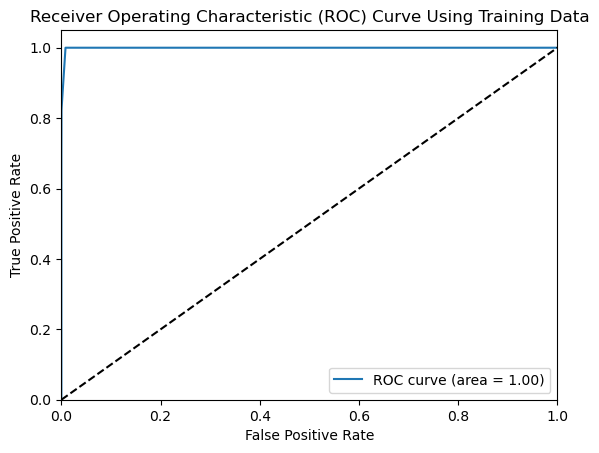

In [127]:
ypred_train = knn_pipeline.predict(X_train)
mat_clf = confusion_matrix(y_train, ypred_train)
report_clf = classification_report(y_train, ypred_train)

print(mat_clf)
print(report_clf)

ypred_trainP = knn_pipeline.predict_proba(X_train)
auc = roc_auc_score(y_train, ypred_trainP[:,1])
print(auc)

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, ypred_trainP[:,1])
plt.plot(fpr_train, tpr_train, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Using Training Data')
plt.legend(loc="lower right")
plt.show()


#Confusion Matrix meaning for testing data
TN(not-fraud) => 12793
FP(actual not fraud but predict fraud) => 3
FN(actual fraud but predict not fraud) we must reduce this => 39
TP(fraud) => 180 

In [123]:
import pandas as pd

df_train = pd.DataFrame({'fpr': fpr_train, 'tpr': tpr_train, 'th': thresholds_train})
df_train

,fpr,tpr,th
0,0.000000,0.000000,inf
1,0.000000,0.698630,1.0
2,0.000156,0.771689,0.8
3,0.000234,0.821918,0.6
4,0.000547,0.831050,0.4
5,0.008284,1.000000,0.2
6,1.000000,1.000000,0.0


In [143]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score


k_values = [1, 3, 5, 7, 9, 11, 13, 15]

results = []

for k in k_values:
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

   
    y_pred_testP = pipe.predict_proba(X_test)
    auc = roc_auc_score(y_test, y_pred_testP[:,1])

    #acc = accuracy_score(y_test, y_pred)
    #print(f"K = {k}, Accuracy = {acc:.4f}")
    print("k_value ",k)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=["Not Fraud", "Fraud"]))
    print("---------")
    
    results.append((k, auc))


k_value  1
[[8519   22]
 [  25  112]]
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00      8541
       Fraud       0.84      0.82      0.83       137

    accuracy                           0.99      8678
   macro avg       0.92      0.91      0.91      8678
weighted avg       0.99      0.99      0.99      8678

---------
k_value  3
[[8538    3]
 [  28  109]]
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00      8541
       Fraud       0.97      0.80      0.88       137

    accuracy                           1.00      8678
   macro avg       0.98      0.90      0.94      8678
weighted avg       1.00      1.00      1.00      8678

---------
k_value  5
[[8538    3]
 [  28  109]]
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00      8541
       Fraud       0.97      0.80      0.88       137

    accuracy                           1.00     

In [147]:
results

[(1, 0.9074712186900967),
 (3, 0.9153477814611701),
 (5, 0.9186226676477651),
 (7, 0.9255946200251769),
 (9, 0.9251643211747201),
 (11, 0.924904518095199),
 (13, 0.932194387398867),
 (15, 0.931988425089115)]